In [1]:
from Code.preprocess import *
from Code.plotting import *

### Construct isoform matrix with relative expression

The create isoform matrix saves a sparse matrix, and corresponding index and column labels to the output folder. 

NOTE: this is the same step as we do before calculating Moran's I. 

In [2]:
fn_allinfo = 'Data/allinfo_ds.filtered.labeled.gz'
fn_CIDmap = 'Data/sample1_barcodeToPos.CellID_ds.tsv.gz'
fn_adata = 'Data/sample1_cellbin_adjusted.h5ad'
output = 'Data/isoform_matrix'

create_isoform_matrix(fn_allinfo,
                      fn_CIDmap,
                      fn_adata,
                      output)

Potentially interesting isoforms (total): 145
Potentially interesting isoforms (novel): 44


  0%|          | 0/198 [00:00<?, ?it/s]

We read this sparse matrix to a dense dataframe so we can plot some examples

In [3]:
x, labels = sparse2df(input_dir = output)

### Plot some examples

We can make a general plot

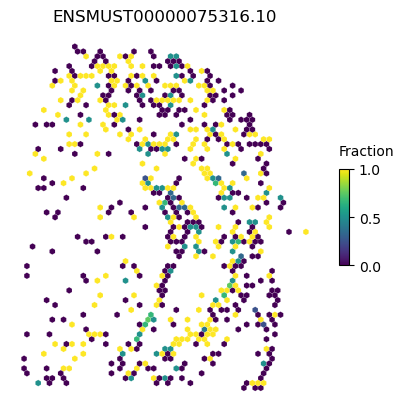

In [4]:
isoform = 'ENSMUST00000075316.10'

spatial_hexplot(x=x, 
                labels=labels, 
                imarray=None,
                varName=isoform, 
                celltype='', 
                hexsize=350)
plt.show()


But also plot the staining in the background

In [5]:
from PIL import Image
Image.MAX_IMAGE_PIXELS = 553190400

im_reg = Image.open('Data/Sample1_ssDNA_regist.tif')
imarray = np.array(im_reg)


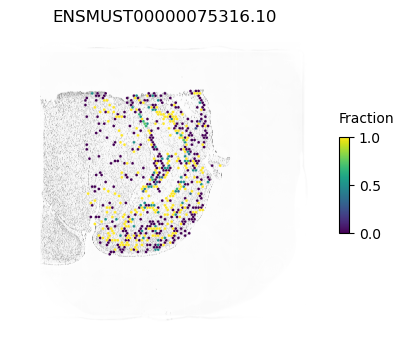

In [6]:
isoform = 'ENSMUST00000075316.10'

spatial_hexplot(x=x, 
                labels=labels, 
                imarray=imarray,
                varName=isoform, 
                celltype='', 
                hexsize=350)
plt.show()


Or we can zoom in a specific region (e.g. the hippocampus)

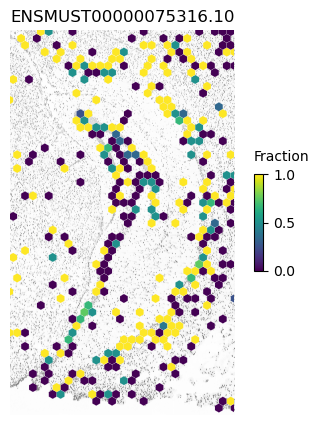

In [7]:
xlim1=8300
xlim2=14100
ylim1=4450
ylim2=14400

spatial_hexplot(x=x, 
                labels=labels, 
                imarray=imarray,
                varName=isoform, 
                celltype='', 
                hexsize=350,
                plot_lim=[xlim1, xlim2, ylim1, ylim2])
plt.show()


And focus on a specific cell type

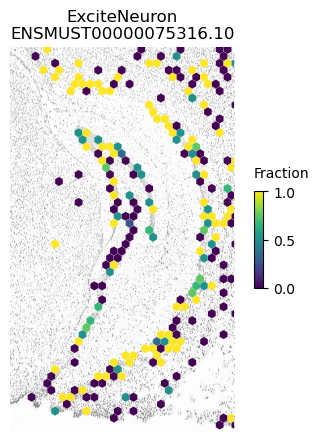

In [8]:
spatial_hexplot(x=x, 
                labels=labels, 
                imarray=imarray,
                varName=isoform, 
                celltype='ExciteNeuron', 
                hexsize=350,
                plot_lim=[xlim1, xlim2, ylim1, ylim2])
plt.show()


And we can even plot specific regions separately as in Figure 3h. 

NOTE: these plots look slightly different from the paper since we downsampled the 4K dataset and not the AE dataset

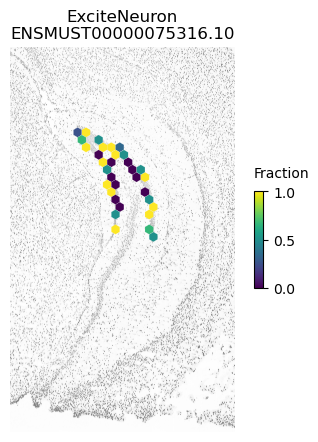

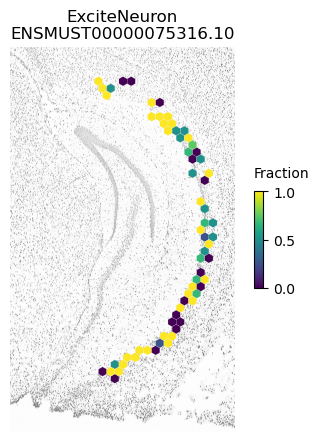

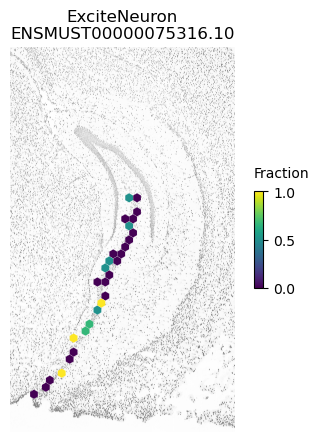

In [9]:
spatial_hexplot(x[(labels['subregion'] == 'DG_ML')], 
                labels[labels['subregion']=='DG_ML'], 
                imarray,
                isoform, 
                celltype='ExciteNeuron', 
                hexsize=350, 
                plot_lim=[xlim1, xlim2, ylim1, ylim2])
plt.show()

spatial_hexplot(x[(labels['subregion'] == 'CA1_ML')], 
                labels[labels['subregion']=='CA1_ML'], 
                imarray,
                isoform, 
                celltype='ExciteNeuron', 
                hexsize=350, 
                plot_lim=[xlim1, xlim2, ylim1, ylim2])
plt.show()

spatial_hexplot(x[(labels['subregion'] == 'CA3_ML')], 
                labels[labels['subregion']=='CA3_ML'], 
                imarray,
                isoform, 
                celltype='ExciteNeuron', 
                hexsize=350, 
                plot_lim=[xlim1, xlim2, ylim1, ylim2])
plt.show()
